In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO X1 YOGA\Downloads\laptop_details.csv")

In [3]:
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


In [4]:
df['Product'][10]

'HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeF...'

In [5]:
df['Feature'][9]

'AMD Ryzen 7 Quad Core Processor16 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty'

In [6]:
df.shape

(720, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [8]:
# Processor Information

regex = r'^(?:AMD|Intel|M1)[\s\w]+Processor'

df['Processor'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [9]:
temp = df['Feature'][100]

regex = r'\d+\sGB[\s\w]+RAM'

fun = lambda x : re.findall(regex, x)

print(fun(temp))

['8 GB DDR4 RAM']


In [10]:
# RAM Information

regex = r'\d+\sGB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [11]:
# OS 

regex = r'[\d]+[\s]bit[\s\w]+Operating System'

df['OS'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [12]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

df['Storage'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [13]:
# Brand

regex = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.findall(regex, x))

# Data Cleaning

In [14]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD],[ASUS]


In [15]:
df.shape

(720, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.8+ KB


In [17]:
df.isnull().sum()

Product        0
Rating       139
MRP            0
Feature        0
Processor      0
RAM            0
OS             0
Storage        0
Brand          0
dtype: int64

In [18]:
print(df['Processor'][0])

print(type(df['Processor'][0]))

['Intel Core i3 Processor']
<class 'list'>


In [19]:
print(''.join(df['Processor'][0]))
print(type(''.join(df['Processor'][0])))

Intel Core i3 Processor
<class 'str'>


In [20]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.OS = df.OS.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))

In [21]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,,512 GB SSD,ASUS


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.8+ KB


In [23]:
df.MRP=df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [24]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,,512 GB SSD,ASUS


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    float64
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(2), object(7)
memory usage: 50.8+ KB


In [26]:
df.isnull().sum()

Product        0
Rating       139
MRP            0
Feature        0
Processor      0
RAM            0
OS             0
Storage        0
Brand          0
dtype: int64

In [27]:
df.duplicated().sum()

297

<AxesSubplot:xlabel='Brand', ylabel='MRP'>

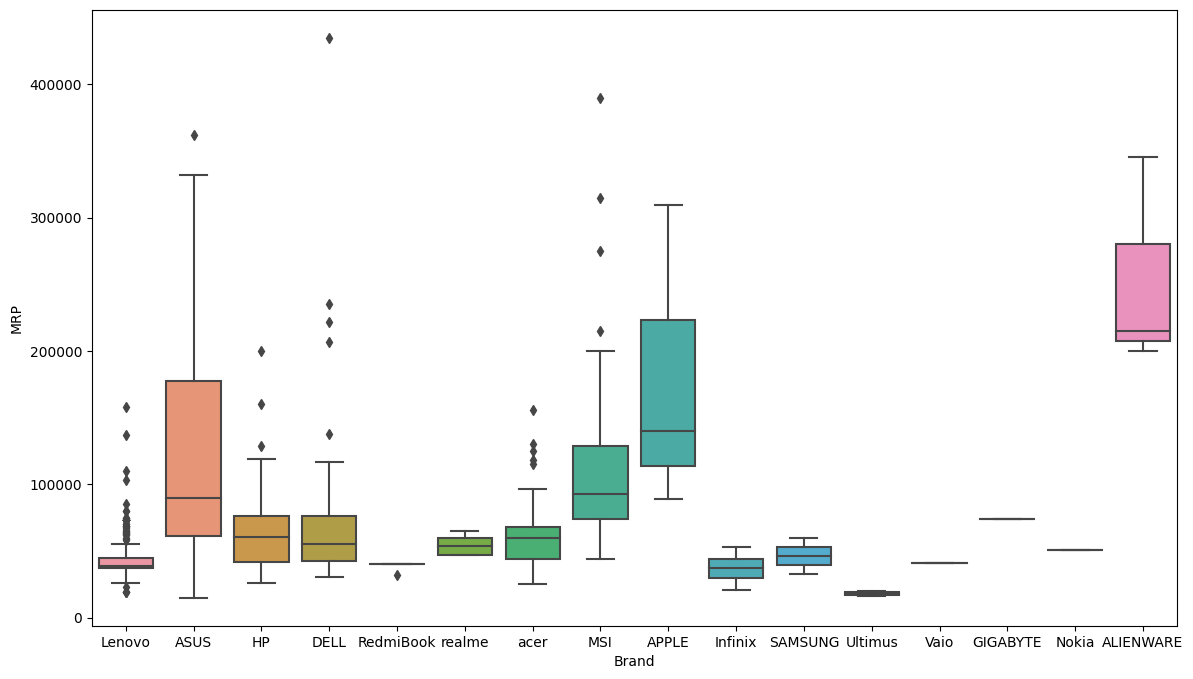

In [28]:
plt.figure(figsize=(14,8))
sns.boxplot(x = df['Brand'],y = df['MRP'])

<AxesSubplot:xlabel='Brand', ylabel='MRP'>

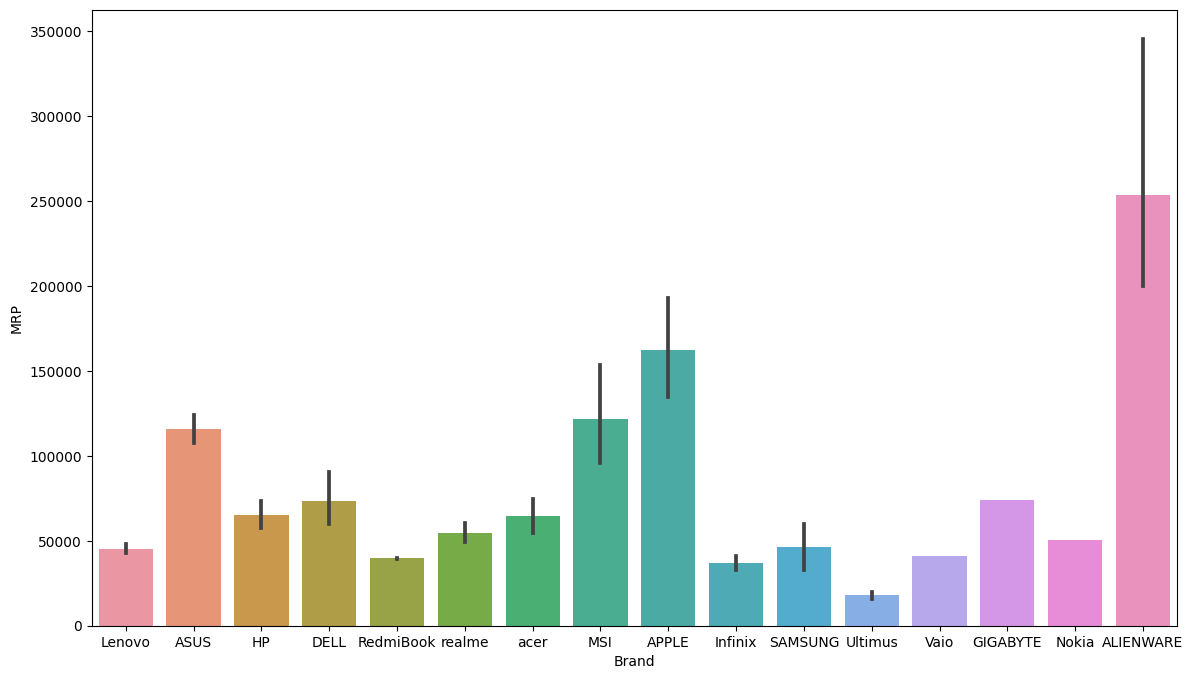

In [29]:
plt.figure(figsize=(14,8))
sns.barplot(x=df['Brand'], y=df['MRP'])

<AxesSubplot:xlabel='Brand', ylabel='count'>

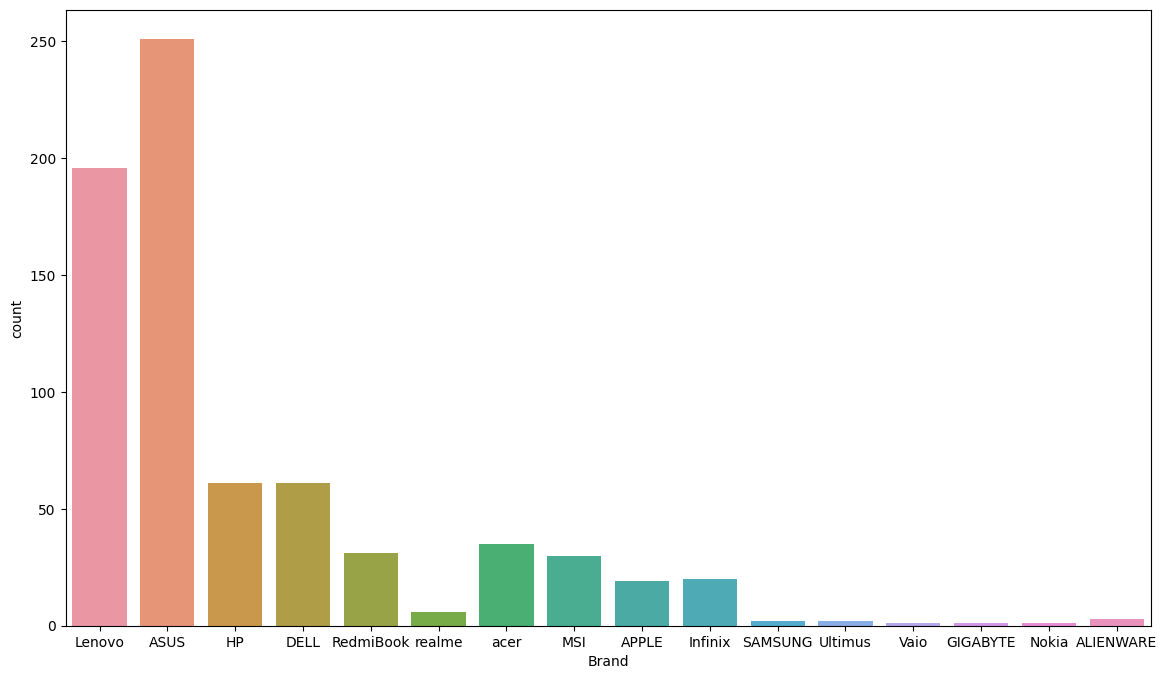

In [30]:
plt.figure(figsize=(14,8))
sns.countplot(x=df['Brand'])
#plt.xticks(rotation='vertical')

In [31]:
df['RAM'].value_counts()

8 GB DDR4 RAM                                                                                             377
16 GB DDR4 RAM                                                                                            153
16 GB DDR5 RAM                                                                                             77
4 GB DDR4 RAM                                                                                              26
8 GB LPDDR4X RAM                                                                                           16
16 GB LPDDR4X RAM                                                                                          16
32 GB DDR5 RAM                                                                                             11
16 GB LPDDR5 RAM                                                                                            9
4 GB LPDDR4 RAM                                                                                             7
16 GB Unif

In [32]:
df['RAM']=df['RAM'].apply(lambda x: x.split(' ')[0])

In [33]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,,512 GB SSD,ASUS


In [34]:
df['RAM'].value_counts()

8      402
16     263
4       37
32      17
128      1
Name: RAM, dtype: int64

In [35]:
df['RAM']=df['RAM'].astype('int32')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    float64
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    int32  
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(2), int32(1), object(6)
memory usage: 47.9+ KB


<AxesSubplot:xlabel='RAM', ylabel='MRP'>

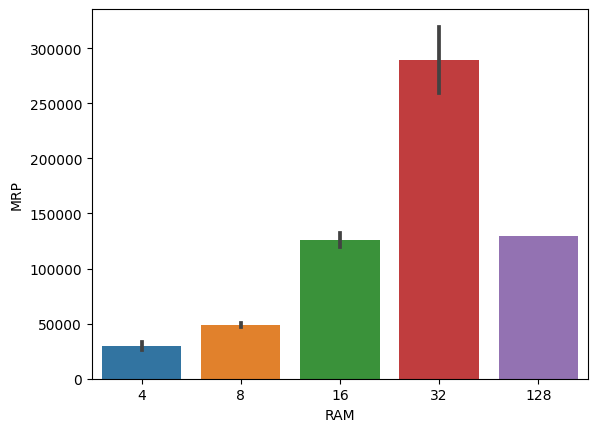

In [37]:
sns.barplot(x = df['RAM'],y = df['MRP'])

C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

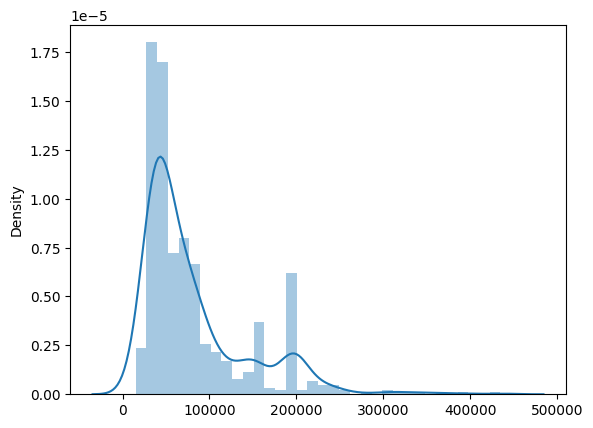

In [38]:
sns.distplot(x=df['MRP'])

<AxesSubplot:xlabel='MRP'>

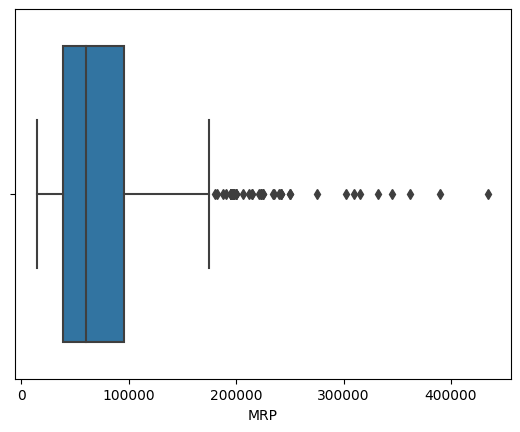

In [39]:
sns.boxplot(x = df['MRP'])

<AxesSubplot:>

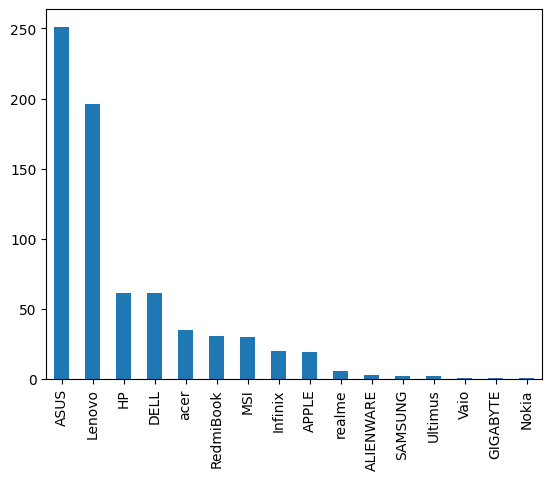

In [40]:
df['Brand'].value_counts().plot(kind='bar')

C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

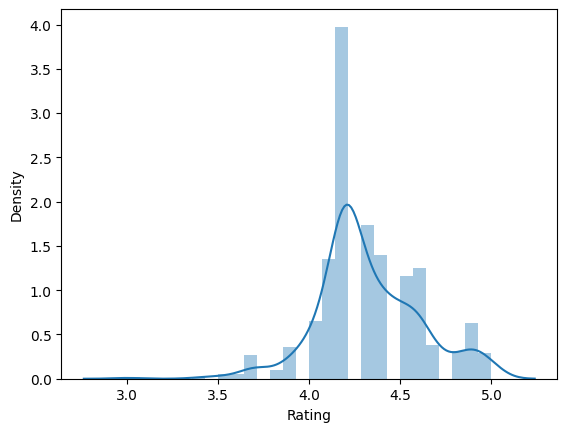

In [41]:
sns.distplot(df['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='MRP'>

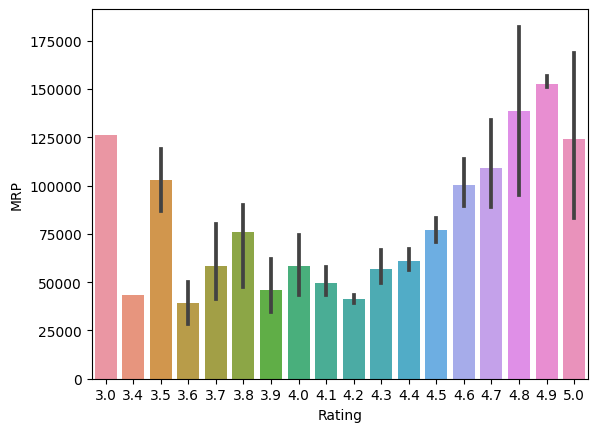

In [42]:
sns.barplot(x=df['Rating'],y = df['MRP'])

<AxesSubplot:xlabel='Rating'>

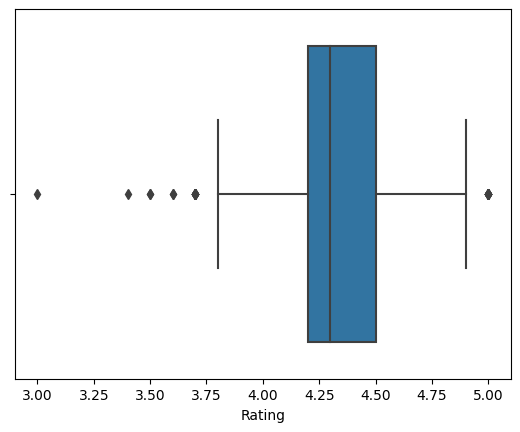

In [43]:
sns.boxplot(x=df['Rating'])

In [44]:
df['Storage'].value_counts()

512 GB SSD                      375
1 TB SSD                        176
256 GB SSD                       98
1 TB HDD256 GB SSD               26
1 TB HDD                         17
                                 10
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [45]:
df['OS'].value_counts()

64 bit Windows 11 Operating System    404
                                      195
64 bit Windows 10 Operating System    117
64 bit DOS Operating System             2
32 bit Windows 11 Operating System      1
64 bit Chrome Operating System          1
Name: OS, dtype: int64

In [46]:
df.corr()['MRP']

Rating    0.537533
MRP       1.000000
RAM       0.637160
Name: MRP, dtype: float64

In [47]:
df['Feature'][10]

'AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayMicrosoft Office Home & Student 20191 Year Onsite Warranty'

In [48]:
df['Processor'].value_counts()

Intel Core i5 Processor              150
Intel Core i3 Processor              129
AMD Ryzen 9 Octa Core Processor       87
AMD Ryzen 7 Octa Core Processor       79
                                      51
Intel Core i7 Processor               49
AMD Ryzen 5 Hexa Core Processor       48
AMD Ryzen 3 Dual Core Processor       42
AMD Ryzen 5 Quad Core Processor       37
Intel Celeron Dual Core Processor     20
Intel Core i9 Processor               10
AMD Ryzen 3 Quad Core Processor        4
Intel Pentium Quad Core Processor      3
Intel Celeron Quad Core Processor      3
Intel Pentium Silver Processor         2
AMD Athlon Dual Core Processor         2
AMD Ryzen 5 Dual Core Processor        1
AMD Ryzen 7 Quad Core Processor        1
AMD Dual Core Processor                1
AMD Ryzen 3 Hexa Core Processor        1
Name: Processor, dtype: int64

In [49]:
df['CPU']= df['Processor'].apply(lambda x:" ".join(x.split()[0:3]))

In [50]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,CPU
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,Intel Core i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,Intel Core i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,512 GB SSD,ASUS,Intel Core i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10 Operating System,512 GB SSD,HP,AMD Ryzen 5
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,,512 GB SSD,ASUS,Intel Core i5


In [51]:
df['CPU'].value_counts()

Intel Core i5           150
Intel Core i3           129
AMD Ryzen 9              87
AMD Ryzen 5              86
AMD Ryzen 7              80
                         51
Intel Core i7            49
AMD Ryzen 3              47
Intel Celeron Dual       20
Intel Core i9            10
Intel Celeron Quad        3
Intel Pentium Quad        3
AMD Athlon Dual           2
Intel Pentium Silver      2
AMD Dual Core             1
Name: CPU, dtype: int64

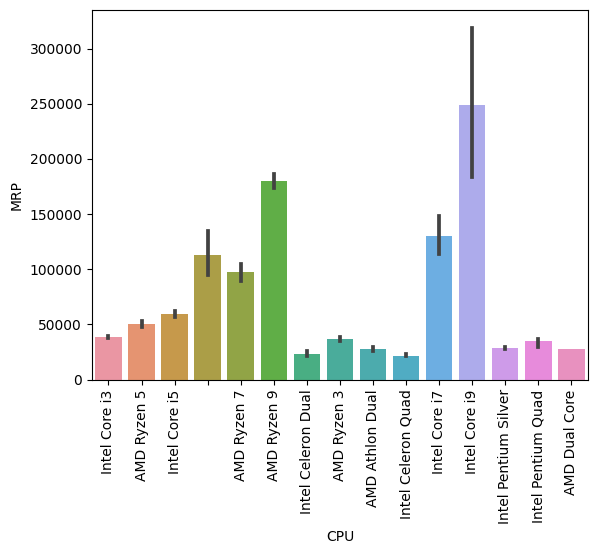

In [52]:
sns.barplot(x = df['CPU'],y = df['MRP'])
plt.xticks(rotation = 'vertical')
plt.show()

In [53]:
cpu_mode=df['CPU'].mode()[0]

In [54]:
df['CPU'].fillna(df['CPU'].mode()[0],inplace=True)

In [55]:
df['CPU'].value_counts()

Intel Core i5           150
Intel Core i3           129
AMD Ryzen 9              87
AMD Ryzen 5              86
AMD Ryzen 7              80
                         51
Intel Core i7            49
AMD Ryzen 3              47
Intel Celeron Dual       20
Intel Core i9            10
Intel Celeron Quad        3
Intel Pentium Quad        3
AMD Athlon Dual           2
Intel Pentium Silver      2
AMD Dual Core             1
Name: CPU, dtype: int64

In [56]:
df['CPU'] = df['CPU'].apply(lambda x: cpu_mode if x == '' else x)

In [57]:
df['CPU'].value_counts()

Intel Core i5           201
Intel Core i3           129
AMD Ryzen 9              87
AMD Ryzen 5              86
AMD Ryzen 7              80
Intel Core i7            49
AMD Ryzen 3              47
Intel Celeron Dual       20
Intel Core i9            10
Intel Celeron Quad        3
Intel Pentium Quad        3
AMD Athlon Dual           2
Intel Pentium Silver      2
AMD Dual Core             1
Name: CPU, dtype: int64

In [58]:
x=df.groupby(['CPU'])['MRP'].mean()

In [59]:
def fetch_processor(text):
    if text == 'Intel Celeron Dual' or text == 'Intel Celeron Quad' or text == 'Intel Pentium Quad' or text == 'Intel Pentium Silver':
        return 'Other Intel Processor'
    elif text == 'AMD Dual Core' or text == 'AMD Athlon Dual':
        return 'AMD Ryzen 3'
    else: 
        return text

In [60]:
df['CPU'] = df['CPU'].apply(fetch_processor)

In [61]:
df['CPU'].value_counts()

Intel Core i5            201
Intel Core i3            129
AMD Ryzen 9               87
AMD Ryzen 5               86
AMD Ryzen 7               80
AMD Ryzen 3               50
Intel Core i7             49
Other Intel Processor     28
Intel Core i9             10
Name: CPU, dtype: int64

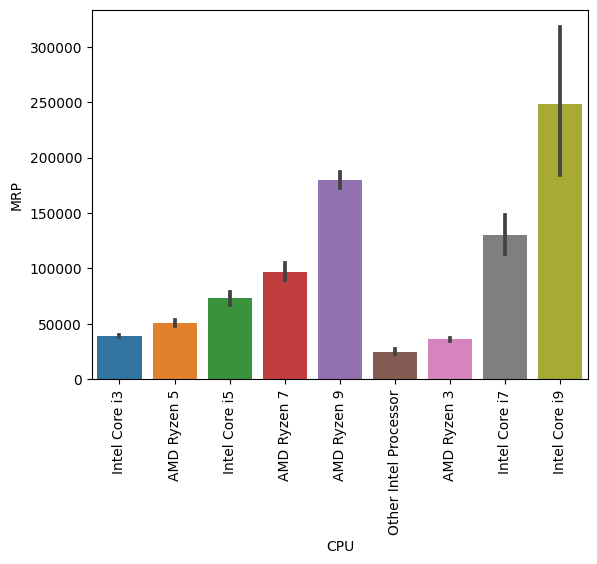

In [62]:
sns.barplot(x=df['CPU'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()


In [63]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,CPU
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,Intel Core i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,Intel Core i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,512 GB SSD,ASUS,Intel Core i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10 Operating System,512 GB SSD,HP,AMD Ryzen 5
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,,512 GB SSD,ASUS,Intel Core i5


In [64]:
df['Storage'].value_counts()

512 GB SSD                      375
1 TB SSD                        176
256 GB SSD                       98
1 TB HDD256 GB SSD               26
1 TB HDD                         17
                                 10
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [65]:
# Extract SSD and HDD columns
df['SSD'] = df['Storage'].str.extract('(\d+ TB|\d+ GB)\s*SSD', expand=False)
df['HDD'] = df['Storage'].str.extract('(\d+ TB|\d+ GB)\s*HDD', expand=False)

# Fill NaN values with 0
df = df.fillna(0)

In [66]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,CPU,SSD,HDD
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,Intel Core i3,256 GB,0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,Intel Core i3,512 GB,0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11 Operating System,512 GB SSD,ASUS,Intel Core i3,512 GB,0
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10 Operating System,512 GB SSD,HP,AMD Ryzen 5,512 GB,0
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,,512 GB SSD,ASUS,Intel Core i5,512 GB,0


In [67]:
df['SSD'].value_counts()

512 GB    377
1 TB      176
256 GB    125
0          27
128 GB      8
2 TB        7
Name: SSD, dtype: int64

In [68]:
df['HDD'].value_counts()

0         672
1 TB       47
256 GB      1
Name: HDD, dtype: int64

<AxesSubplot:xlabel='HDD', ylabel='MRP'>

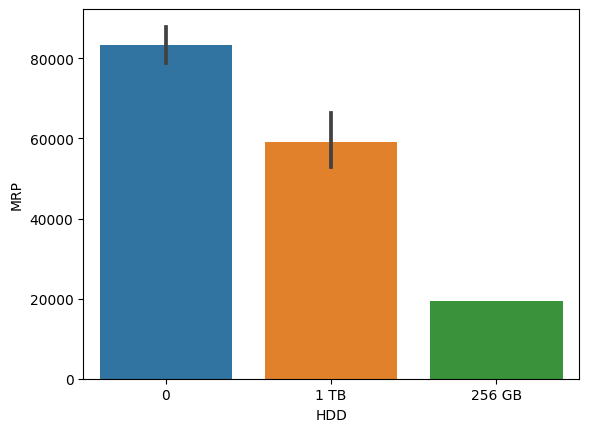

In [69]:
sns.barplot(x=df['HDD'],y = df['MRP'])

<AxesSubplot:xlabel='SSD', ylabel='MRP'>

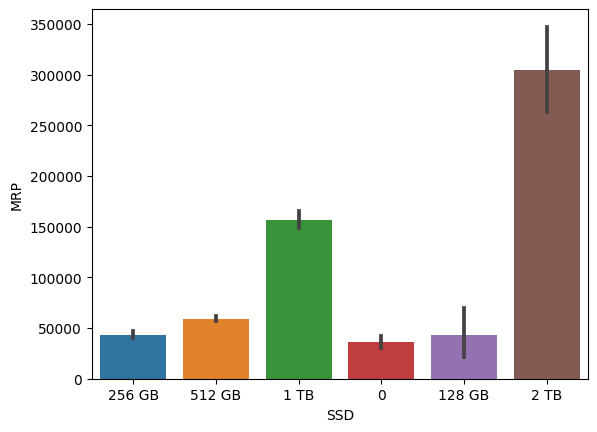

In [70]:
sns.barplot(x =df['SSD'], y = df['MRP'])

In [71]:
df.corr()['MRP']

Rating   -0.434481
MRP       1.000000
RAM       0.637160
Name: MRP, dtype: float64

In [72]:
df['OS'].value_counts()

64 bit Windows 11 Operating System    404
                                      195
64 bit Windows 10 Operating System    117
64 bit DOS Operating System             2
32 bit Windows 11 Operating System      1
64 bit Chrome Operating System          1
Name: OS, dtype: int64

In [73]:
os_mode=df['OS'].mode()[0]

In [74]:
df['OS']=df['OS'].apply(lambda x : os_mode if x == '' else x)

In [75]:
df['OS'].value_counts()

64 bit Windows 11 Operating System    599
64 bit Windows 10 Operating System    117
64 bit DOS Operating System             2
32 bit Windows 11 Operating System      1
64 bit Chrome Operating System          1
Name: OS, dtype: int64

In [76]:
 df['OS']=df["OS"].str.split("Operating System", expand=True)[0].str.strip()


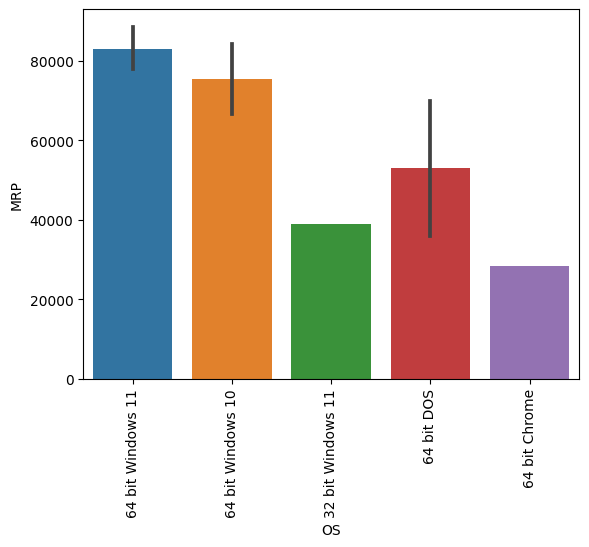

In [77]:
sns.barplot(x =df['OS'], y= df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

In [78]:
df['OS'].value_counts()

64 bit Windows 11    599
64 bit Windows 10    117
64 bit DOS             2
32 bit Windows 11      1
64 bit Chrome          1
Name: OS, dtype: int64

In [79]:
def os_cat(text):
    if text == '64 bit DOS' or text == '32 bit Windows 11' or text == '64 bit Chrome':
        return 'other'
    else:
        return text

In [80]:
df['OS']=df['OS'].apply(os_cat)

In [81]:
df['OS'].value_counts()

64 bit Windows 11    599
64 bit Windows 10    117
other                  4
Name: OS, dtype: int64

<AxesSubplot:xlabel='OS', ylabel='MRP'>

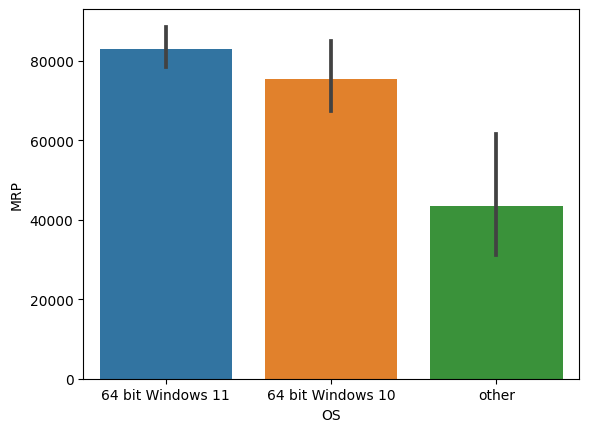

In [82]:
sns.barplot(x = df['OS'] , y = df['MRP'])

In [83]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,CPU,SSD,HDD
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,256 GB SSD,Lenovo,Intel Core i3,256 GB,0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,Lenovo,Intel Core i3,512 GB,0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i3,512 GB,0
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10,512 GB SSD,HP,AMD Ryzen 5,512 GB,0
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i5,512 GB,0


In [84]:
df.corr()['MRP']

Rating   -0.434481
MRP       1.000000
RAM       0.637160
Name: MRP, dtype: float64

In [85]:
df.duplicated().sum()

297

C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MRP', ylabel='Density'>

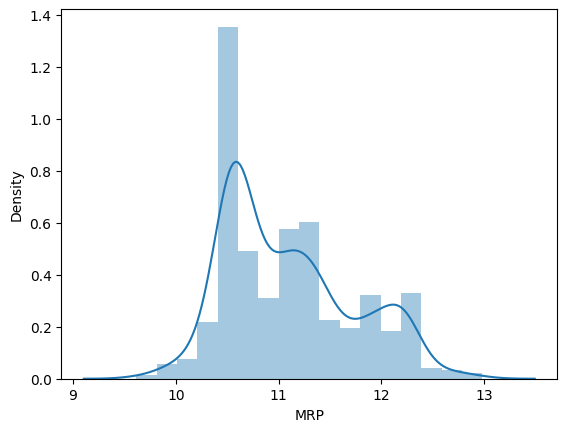

In [86]:
sns.distplot(np.log(df['MRP']))

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     720 non-null    float64
 2   MRP        720 non-null    float64
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    int32  
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
 9   CPU        720 non-null    object 
 10  SSD        720 non-null    object 
 11  HDD        720 non-null    object 
dtypes: float64(2), int32(1), object(9)
memory usage: 64.8+ KB


In [88]:
df['RAM'].unique()

array([  8,  16,   4,  32, 128])

In [89]:
df['RAM'].value_counts()

8      402
16     263
4       37
32      17
128      1
Name: RAM, dtype: int64

In [90]:
df['OS'].unique()

array(['64 bit Windows 11', '64 bit Windows 10', 'other'], dtype=object)

In [91]:
new_d = df.drop_duplicates()

In [92]:
new_d['CPU']=new_d['CPU'].astype(str)
new_d['SSD']=new_d['SSD'].astype(str)
new_d['HDD']=new_d['HDD'].astype(str)

C:\Users\LENOVO X1 YOGA\AppData\Local\Temp\ipykernel_12940\2532752512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d['CPU']=new_d['CPU'].astype(str)
C:\Users\LENOVO X1 YOGA\AppData\Local\Temp\ipykernel_12940\2532752512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d['SSD']=new_d['SSD'].astype(str)
C:\Users\LENOVO X1 YOGA\AppData\Local\Temp\ipykernel_12940\2532752512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [94]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [95]:
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,CPU,SSD,HDD
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,256 GB SSD,Lenovo,Intel Core i3,256 GB,0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,Lenovo,Intel Core i3,512 GB,0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i3,512 GB,0
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10,512 GB SSD,HP,AMD Ryzen 5,512 GB,0
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i5,512 GB,0
...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4,64 bit Windows 11,,ASUS,Other Intel Processor,0,0
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8,64 bit Windows 11,512 GB SSD,Lenovo,AMD Ryzen 7,512 GB,0
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,0.0,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16,64 bit Windows 11,1 TB SSD,ASUS,AMD Ryzen 9,1 TB,0
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i7,512 GB,0


In [96]:
df.isnull().sum()

Product      0
Rating       0
MRP          0
Feature      0
Processor    0
RAM          0
OS           0
Storage      0
Brand        0
CPU          0
SSD          0
HDD          0
dtype: int64

In [97]:
df.duplicated().sum()

297

In [98]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,CPU,SSD,HDD
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,256 GB SSD,Lenovo,Intel Core i3,256 GB,0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,Lenovo,Intel Core i3,512 GB,0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i3,512 GB,0
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10,512 GB SSD,HP,AMD Ryzen 5,512 GB,0
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i5,512 GB,0


In [99]:
df['SSD'].value_counts()

512 GB    377
1 TB      176
256 GB    125
0          27
128 GB      8
2 TB        7
Name: SSD, dtype: int64

In [100]:
df["SSD_GB"] = df["SSD"].str.replace('GB', '')
df["SSD_GB"] = df["SSD"].str.replace('TB', '000')

In [101]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,CPU,SSD,HDD,SSD_GB
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,256 GB SSD,Lenovo,Intel Core i3,256 GB,0,256 GB
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,Lenovo,Intel Core i3,512 GB,0,512 GB
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i3,512 GB,0,512 GB
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10,512 GB SSD,HP,AMD Ryzen 5,512 GB,0,512 GB
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i5,512 GB,0,512 GB


In [102]:
df['SSD_GB'].value_counts()

512 GB    377
1 000     176
256 GB    125
128 GB      8
2 000       7
Name: SSD_GB, dtype: int64

In [103]:
a=df['SSD_GB'].mode()[0]

In [104]:
df['SSD_GB']=df['SSD_GB'].fillna(a)

In [105]:
df["SSD_GB"]=df["SSD_GB"].apply(lambda x: x.replace('512 GB','512'))
df["SSD_GB"]=df["SSD_GB"].apply(lambda x: x.replace('1 000','1000'))
df["SSD_GB"]=df["SSD_GB"].apply(lambda x: x.replace('256 GB','256'))
df["SSD_GB"]=df["SSD_GB"].apply(lambda x: x.replace('128 GB','128'))
df["SSD_GB"]=df["SSD_GB"].apply(lambda x: x.replace('2 000','2000'))

In [106]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,CPU,SSD,HDD,SSD_GB
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,256 GB SSD,Lenovo,Intel Core i3,256 GB,0,256
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,Lenovo,Intel Core i3,512 GB,0,512
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i3,512 GB,0,512
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10,512 GB SSD,HP,AMD Ryzen 5,512 GB,0,512
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i5,512 GB,0,512


In [107]:
df["SSD_GB"].value_counts()

512     404
1000    176
256     125
128       8
2000      7
Name: SSD_GB, dtype: int64

In [108]:
df["SSD_GB"].isnull().sum()

0

In [109]:
df["SSD_GB"]=df["SSD_GB"].astype('int')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     720 non-null    float64
 2   MRP        720 non-null    float64
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    int32  
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
 9   CPU        720 non-null    object 
 10  SSD        720 non-null    object 
 11  HDD        720 non-null    object 
 12  SSD_GB     720 non-null    int32  
dtypes: float64(2), int32(2), object(9)
memory usage: 67.6+ KB


In [111]:
df['HDD'].value_counts()

0         672
1 TB       47
256 GB      1
Name: HDD, dtype: int64

In [112]:
df['HDD'].astype(str)

0         0
1         0
2         0
3         0
4         0
       ... 
715       0
716       0
717       0
718       0
719    1 TB
Name: HDD, Length: 720, dtype: object

In [113]:
df['HDD'].isnull().sum()

0

In [114]:
df['HDD_GB']=df['HDD'].replace({'1 TB':'1000','256 GB':'256','0':'0'})

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     720 non-null    float64
 2   MRP        720 non-null    float64
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    int32  
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
 9   CPU        720 non-null    object 
 10  SSD        720 non-null    object 
 11  HDD        720 non-null    object 
 12  SSD_GB     720 non-null    int32  
 13  HDD_GB     720 non-null    object 
dtypes: float64(2), int32(2), object(10)
memory usage: 73.2+ KB


In [116]:
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,CPU,SSD,HDD,SSD_GB,HDD_GB
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,256 GB SSD,Lenovo,Intel Core i3,256 GB,0,256,0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,Lenovo,Intel Core i3,512 GB,0,512,0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i3,512 GB,0,512,0
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10,512 GB SSD,HP,AMD Ryzen 5,512 GB,0,512,0
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i5,512 GB,0,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4,64 bit Windows 11,,ASUS,Other Intel Processor,0,0,512,0
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8,64 bit Windows 11,512 GB SSD,Lenovo,AMD Ryzen 7,512 GB,0,512,0
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,0.0,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16,64 bit Windows 11,1 TB SSD,ASUS,AMD Ryzen 9,1 TB,0,1000,0
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i7,512 GB,0,512,0


In [117]:
df['HDD_GB']=df['HDD_GB'].astype(int)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     720 non-null    float64
 2   MRP        720 non-null    float64
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    int32  
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
 9   CPU        720 non-null    object 
 10  SSD        720 non-null    object 
 11  HDD        720 non-null    object 
 12  SSD_GB     720 non-null    int32  
 13  HDD_GB     720 non-null    int32  
dtypes: float64(2), int32(3), object(9)
memory usage: 70.4+ KB


In [119]:
df['HDD_GB'].value_counts()

0       672
1000     47
256       1
Name: HDD_GB, dtype: int64

In [120]:
df.drop(['HDD','SSD'],axis=1,inplace=True)

In [121]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,CPU,SSD_GB,HDD_GB
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,256 GB SSD,Lenovo,Intel Core i3,256,0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,Lenovo,Intel Core i3,512,0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i3,512,0
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10,512 GB SSD,HP,AMD Ryzen 5,512,0
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i5,512,0


In [122]:
df['OS'].value_counts()

64 bit Windows 11    599
64 bit Windows 10    117
other                  4
Name: OS, dtype: int64

In [123]:
new_df=df.drop_duplicates()

In [124]:
new_df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,CPU,SSD_GB,HDD_GB
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,256 GB SSD,Lenovo,Intel Core i3,256,0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,Lenovo,Intel Core i3,512,0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i3,512,0
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8,64 bit Windows 10,512 GB SSD,HP,AMD Ryzen 5,512,0
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i5,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,0.0,76590.0,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,Intel Core i5 Processor,16,64 bit Windows 11,512 GB SSD,DELL,Intel Core i5,512,0
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,4.6,90000.0,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,AMD Ryzen 7 Octa Core Processor,16,64 bit Windows 10,512 GB SSD,HP,AMD Ryzen 7,512,0
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4,64 bit Windows 11,,ASUS,Other Intel Processor,512,0
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16,64 bit Windows 11,512 GB SSD,ASUS,Intel Core i7,512,0


In [126]:
new_df.to_csv('laptop_data.csv',index=False)

In [ ]:
new_df.drop(['Storage','Rating','Processor','Brand','Product','Feature'],axis=1,inplace=True)

In [ ]:
new_df.head()

In [ ]:
new_df=pd.get_dummies(new_df,drop_first=True)

In [ ]:
x = new_df.drop('MRP',axis=1)

In [ ]:
y = np.log(new_df['MRP'])

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
l = LinearRegression().fit(x_train,y_train)

In [ ]:
y_pred = l.predict(x_test)

In [ ]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
x.columns

In [ ]:
rf = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15).fit(x_train,y_train)
y_pred = rf.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
dt= DecisionTreeRegressor(max_depth=8).fit(x_train,y_train)
y_pred = dt.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
kn = KNeighborsRegressor(n_neighbors=3).fit(x_train,y_train)
y_pred = kn.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
s = SVR(kernel='rbf',C=10000,epsilon=0.1).fit(x_train,y_train)
y_pred = s.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
x = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5).fit(x_train,y_train)
y_pred = x.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


In [ ]:
rdg=Ridge(alpha=10).fit(x_train,y_train)
y_pred = rdg.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


In [ ]:
lass=Lasso(alpha=0.001).fit(x_train,y_train)
y_pred = lass.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


In [ ]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))